In [61]:
var openDigger = require('../src/open_digger');
var query = openDigger.driver.clickhouse.query;
var repo_id = 7691631

var year = 2021, startYear = 2015;
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); 

var months = Array.from({ length: 12 }, (_, i) => i + 1); 

In [62]:
var dates = [];
var dates_for_print = []
years.forEach(year =>{
    months.forEach(month =>{
        dates.push([year, month]);
        dates_for_print.push(year + '-' + month);
    });
});


In [63]:
// 获取第一次push的时间(年月)
var start_index = 0;
promise = Promise.all(dates.map(date => {
    var q = `SELECT COUNT(*) as count FROM github_log.events where repo_id = ${repo_id} and toMonth(created_at) = ${date[1]} and type = 'PushEvent'`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    for (var i in data) {
        if (parseInt(data[i][0].count) > 0) {
            start_index = i;
            break;
        }
    }
});

In [68]:
var used_dates = dates.slice(start_index);
var used_dates_print = []
used_dates.forEach(date =>{
    used_dates_print.push(date[0] + '-' + date[1]);
});

<font size="5">Fork/Star数量</font>

In [69]:
var fork_num = []
Promise.all(used_dates.map(date => {
    var q = `SELECT COUNT() as fork_num FROM github_log.events where repo_id = ${repo_id} and toYear(created_at)=${date[0]} and toMonth(created_at) = ${date[1]} and type = 'ForkEvent'`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    data.forEach(d => {
        fork_num.push(parseInt(d[0].fork_num));
    });
});

In [70]:
var star_num = []
Promise.all(used_dates.map(date => {
    var q = `SELECT COUNT() as star_num FROM github_log.events where repo_id = ${repo_id} and toYear(created_at)=${date[0]} and toMonth(created_at) = ${date[1]} and type = 'WatchEvent'`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    data.forEach(d => {
        star_num.push(parseInt(d[0].star_num));
    });
});


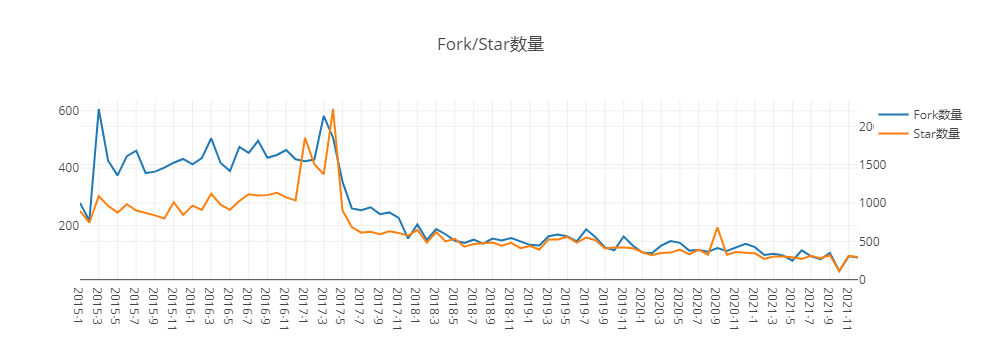

In [67]:
openDigger.render.plotly([
    {x: used_dates_print, y: fork_num, mode: 'scatter', name: 'Fork数量'},
    {x: used_dates_print, y: star_num, mode: 'scatter', name: 'Star数量', yaxis: 'y2'},
], {
    title: 'Fork/Star数量',
    yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
    xaxis: {type: 'category'}
});
var table_items = []
for (var i = 0; i < print_dates.length; ++i) {
    table_items.push({'日期': used_dates_print[i], 
                      'Fork数量': fork_num[i], 
                      'Star数量': star_num[i]});
}
console.table(table_items);

In [39]:
var star_num = []
Promise.all(used_dates.map(date => {
    var q = `SELECT COUNT() as star_num FROM github_log.events where repo_id = ${repo_id} and toYear(created_at)=${date[0]} and toMonth(created_at) = ${date[1]} and type = 'WatchEvent'`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    data.forEach(d => {
        star_num.push(parseInt(d[0].star_num));
    });
});


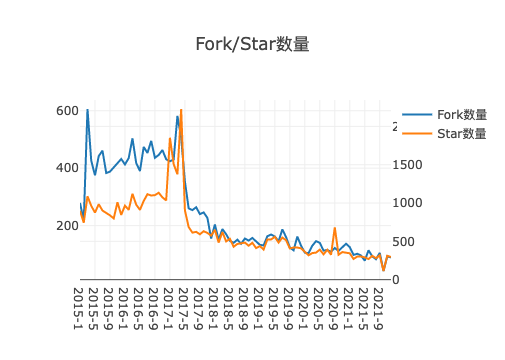

In [42]:
openDigger.render.plotly([
    {x: used_dates_print, y: fork_num, mode: 'scatter', name: 'Fork数量'},
    {x: used_dates_print, y: star_num, mode: 'scatter', name: 'Star数量', yaxis: 'y2'},
], {
    title: 'Fork/Star数量',
    yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
    xaxis: {type: 'category'}
});
    
var table_items = []
for (var i = 0; i < print_dates.length; ++i) {
    table_items.push({'日期': used_dates_print[i], 
                      'Fork数量': fork_num[i], 
                      'Star数量': star_num[i]});
}
console.table(table_items);

<font size="5">Issue数量</font>

In [43]:
var opened_count = []
Promise.all(dates.map(date => {
    var q = `SELECT COUNT(*) as opened_count FROM github_log.events where repo_id = ${repo_id} and toYear(created_at)=${date[0]} and toMonth(created_at) = ${date[1]} and type = 'IssuesEvent' and action = 'opened'`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    data.forEach(d => {
        opened_count.push(parseInt(d[0].opened_count));
    });
});

In [44]:

var closed_count = []
Promise.all(dates.map(date => {
    var q = `SELECT COUNT(*) as closed_count FROM github_log.events where repo_id = ${repo_id} and toYear(created_at)=${date[0]} and toMonth(created_at) = ${date[1]} and type = 'IssuesEvent' and action = 'closed'`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    data.forEach(d => {
        closed_count.push(parseInt(d[0].closed_count));
    });
});

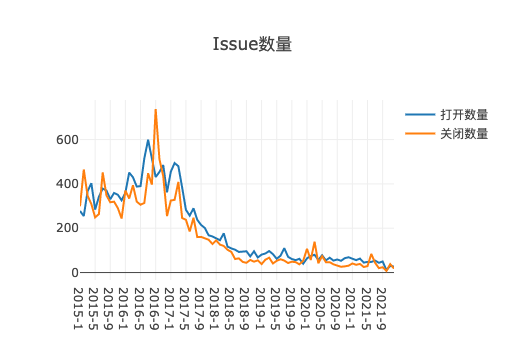

In [45]:
openDigger.render.plotly([
    {x: used_dates_print, y: opened_count, mode: 'scatter', name: '打开数量'},
    {x: used_dates_print, y: closed_count, mode: 'scatter', name: '关闭数量'},
], {
    title: 'Issue数量',
    yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
    xaxis: {type: 'category'}
});
    
var table_items = []
for (var i = 0; i < print_dates.length; ++i) {
    table_items.push({'日期': used_dates_print[i], 
                      '打开数量': opened_count[i], 
                      '关闭数量': closed_count[i]});
}
console.table(table_items);

<font size="5">PR数量</font>

In [46]:
opened_pr = []
Promise.all(used_dates.map(date => {
    var q = `SELECT count(*) as count FROM github_log.events where repo_id = ${repo_id} and toYear(created_at)=${date[0]} and toMonth(created_at) = ${date[1]} and type = 'PullRequestEvent' and action = 'opened'`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    data.forEach(d => {
        opened_pr.push(parseInt(d[0].count));
    });
});

In [47]:
merged_pr = []
Promise.all(used_dates.map(date => {
    var q = `SELECT count(*) as count FROM github_log.events where repo_id = ${repo_id} and toYear(created_at)=${date[0]} and toMonth(created_at) = ${date[1]} and type = 'PullRequestEvent' and pull_merged = '1'`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    data.forEach(d => {
        merged_pr.push(parseInt(d[0].count));
    });
});

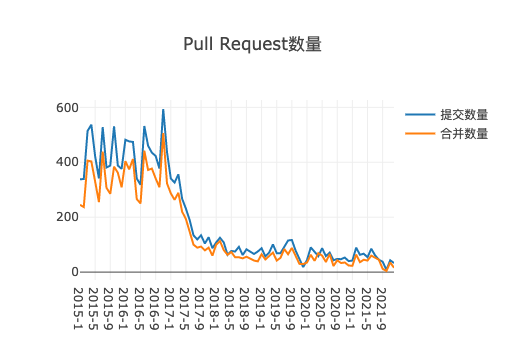

┌─────────┬───────────┬──────────┬──────────┐
│ (index) │   日期    │ 提交数量 │ 合并数量 │
├─────────┼───────────┼──────────┼──────────┤
│    0    │ '2015-1'  │   338    │   245    │
│    1    │ '2015-2'  │   339    │   237    │
│    2    │ '2015-3'  │   514    │   406    │
│    3    │ '2015-4'  │   537    │   403    │
│    4    │ '2015-5'  │   422    │   330    │
│    5    │ '2015-6'  │   341    │   255    │
│    6    │ '2015-7'  │   528    │   439    │
│    7    │ '2015-8'  │   381    │   307    │
│    8    │ '2015-9'  │   388    │   285    │
│    9    │ '2015-10' │   531    │   384    │
│   10    │ '2015-11' │   388    │   362    │
│   11    │ '2015-12' │   376    │   309    │
│   12    │ '2016-1'  │   482    │   404    │
│   13    │ '2016-2'  │   476    │   374    │
│   14    │ '2016-3'  │   474    │   412    │
│   15    │ '2016-4'  │   341    │   266    │
│   16    │ '2016-5'  │   318    │   250    │
│   17    │ '2016-6'  │   532    │   442    │
│   18    │ '2016-7'  │   460    │   372    

In [48]:
openDigger.render.plotly([
    {x: used_dates_print, y: opened_pr, mode: 'scatter', name: '提交数量'},
    {x: used_dates_print, y: merged_pr, mode: 'scatter', name: '合并数量'},
], {
    title: 'Pull Request数量',
    yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
    xaxis: {type: 'category'}
});

var table_items = []
for (var i = 0; i < used_dates_print.length; ++i) {
    table_items.push({'日期': used_dates_print[i], 
                      '提交数量': opened_pr[i], 
                      '合并数量': merged_pr[i]});
}
console.table(table_items);